In [4]:
from scipy.stats import pearsonr
import pandas as pd
import numpy as np

In [5]:
df_gene = pd.read_csv('../../data/GeneExp_Wilcoxon_test_Analysis_Log10_P_value_C2_KEGG_MEDICUS.csv')
# 对除了第一列的每一行计算Z-score
# df_gene.iloc[:, 1:] = df_gene.iloc[:, 1:].apply(lambda x: (x - x.mean()) / x.std())
df_gene.head()

,cell_line,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_IRON_TO_ANTEROGRADE_AXONAL_TRANSPORT,KEGG_MEDICUS_ENV_FACTOR_METALS_TO_JNK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_METALS_TO_KEAP1_NRF2_SIGNALIG_PATHWAY,...,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_26S_PROTEASOME_MEDIATED_PROTEIN_DEGRADATION,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_MGLUR5_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PERK_ATF4_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PRNP_PI3K_NOX2_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_TRANSPORT_OF_CALCIUM,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_VGCC_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_TEL_AML1_FUSION_TO_TRANSCRIPTIONAL_REPRESSION,KEGG_MEDICUS_VARIANT_TGFA_OVEREXPRESSION_TO_PI3K_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_TMPRSS2_ERG_FUSION_TO_TRANSCRIPTIONAL_ACTIVATION,KEGG_MEDICUS_VARIANT_TRK_FUSION_KINASE_TO_RAS_ERK_SIGNALING_PATHWAY
0,HL60,4.214134,0.440202,1.470915,0.205382,1.450508,1.482270,0.343427,0.748859,0.372432,...,17.685880,1.689896,2.603777,3.056268,1.462969,1.259628,1.490945,0.952237,0.182561,1.939787
1,HEL,3.646497,0.135204,1.566388,0.925705,1.111581,0.883885,0.949699,0.261281,0.576484,...,15.719172,1.853080,1.901783,1.311271,0.849546,0.863047,0.123552,0.346157,1.325299,2.701512
2,MONOMAC6,4.472972,0.014476,1.661451,0.019613,1.938533,1.503992,0.675432,0.944259,0.700977,...,17.283634,1.538003,3.062976,2.903670,1.140496,0.942227,0.708988,0.904325,0.409584,2.088677
3,LS513,4.352599,0.462321,1.699385,0.407889,0.665094,2.222235,0.398729,1.351826,1.652013,...,16.863173,1.824951,2.086926,0.256067,1.761924,0.436037,0.022385,0.619383,0.759916,1.872848
4,A101D,4.053421,0.062876,1.848867,0.094523,1.103970,1.862741,2.710302,0.520589,1.123209,...,19.239258,2.301589,3.182736,0.921441,1.438838,0.630094,0.104327,1.590609,0.198160,2.121071


In [6]:
import re

def clean_cell_line_name(name):
    cleaned_name = re.sub(r'[^a-zA-Z0-9]', '', str(name))  # 移除非字母数字字符
    uppercased_name = cleaned_name.upper()  # 将所有字符转换为大写
    return uppercased_name

In [7]:
df_model = pd.read_csv('../../data/Model.csv')
# 将CellLineName这一列所有单元，进行规范化处理
df_model['StrippedCellLineName'] = df_model['StrippedCellLineName'].apply(clean_cell_line_name)
df_model = df_model[['StrippedCellLineName', 'OncotreeCode']]
df_model.head()

,StrippedCellLineName,OncotreeCode
0,NIHOVCAR3,HGSOC
1,HL60,AML
2,CACO2,COAD
3,HEL,AML
4,HEL9217,AML


In [8]:
# 将df_gene和df_model进行合并
df_gene_model = pd.merge(df_gene, df_model, left_on='cell_line', right_on='StrippedCellLineName', how='left')
# 去掉StrippedCellLineName这一列，将OncotreeCode这一列放在最前面
df_gene_model = df_gene_model.drop('StrippedCellLineName', axis=1)
print(df_gene_model.shape)
df_gene_model.head()

(688, 621)


,cell_line,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_IRON_TO_ANTEROGRADE_AXONAL_TRANSPORT,KEGG_MEDICUS_ENV_FACTOR_METALS_TO_JNK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_METALS_TO_KEAP1_NRF2_SIGNALIG_PATHWAY,...,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_MGLUR5_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PERK_ATF4_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PRNP_PI3K_NOX2_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_TRANSPORT_OF_CALCIUM,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_VGCC_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_TEL_AML1_FUSION_TO_TRANSCRIPTIONAL_REPRESSION,KEGG_MEDICUS_VARIANT_TGFA_OVEREXPRESSION_TO_PI3K_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_TMPRSS2_ERG_FUSION_TO_TRANSCRIPTIONAL_ACTIVATION,KEGG_MEDICUS_VARIANT_TRK_FUSION_KINASE_TO_RAS_ERK_SIGNALING_PATHWAY,OncotreeCode
0,HL60,4.214134,0.440202,1.470915,0.205382,1.450508,1.482270,0.343427,0.748859,0.372432,...,1.689896,2.603777,3.056268,1.462969,1.259628,1.490945,0.952237,0.182561,1.939787,AML
1,HEL,3.646497,0.135204,1.566388,0.925705,1.111581,0.883885,0.949699,0.261281,0.576484,...,1.853080,1.901783,1.311271,0.849546,0.863047,0.123552,0.346157,1.325299,2.701512,AML
2,MONOMAC6,4.472972,0.014476,1.661451,0.019613,1.938533,1.503992,0.675432,0.944259,0.700977,...,1.538003,3.062976,2.903670,1.140496,0.942227,0.708988,0.904325,0.409584,2.088677,AMOL
3,LS513,4.352599,0.462321,1.699385,0.407889,0.665094,2.222235,0.398729,1.351826,1.652013,...,1.824951,2.086926,0.256067,1.761924,0.436037,0.022385,0.619383,0.759916,1.872848,COAD
4,A101D,4.053421,0.062876,1.848867,0.094523,1.103970,1.862741,2.710302,0.520589,1.123209,...,2.301589,3.182736,0.921441,1.438838,0.630094,0.104327,1.590609,0.198160,2.121071,MEL


In [9]:
# 筛选出cell_line为：['NCIH2172','CHAGOK1','LCLC103H','NCIH1299','NCIH2170','RERFLCSQ1','NCIH146','NCIH526','NCIH1963','LU135','EKVX','PC14','HCC827','NCIH1355','NCIH2228']的数据
# 去掉EKVX、NCIH1355
df_gene_model = df_gene_model[df_gene_model['cell_line'].isin(['NCIH2172','CHAGOK1','LCLC103H','NCIH1299','NCIH2170','RERFLCSQ1','NCIH146','NCIH526','NCIH1963','LU135','PC14','HCC827','NCIH2228'])]
df_gene_model.head(15)

,cell_line,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_IRON_TO_ANTEROGRADE_AXONAL_TRANSPORT,KEGG_MEDICUS_ENV_FACTOR_METALS_TO_JNK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_METALS_TO_KEAP1_NRF2_SIGNALIG_PATHWAY,...,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_MGLUR5_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PERK_ATF4_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PRNP_PI3K_NOX2_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_TRANSPORT_OF_CALCIUM,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_VGCC_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_TEL_AML1_FUSION_TO_TRANSCRIPTIONAL_REPRESSION,KEGG_MEDICUS_VARIANT_TGFA_OVEREXPRESSION_TO_PI3K_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_TMPRSS2_ERG_FUSION_TO_TRANSCRIPTIONAL_ACTIVATION,KEGG_MEDICUS_VARIANT_TRK_FUSION_KINASE_TO_RAS_ERK_SIGNALING_PATHWAY,OncotreeCode
6,HCC827,4.311409,0.030073,2.248177,0.193846,1.177187,2.521932,1.439627,1.487070,0.978769,...,1.846803,3.074031,1.499976,1.367406,0.992884,0.102181,1.243041,0.092916,2.274069,LUAD
14,PC14,4.352209,1.894415,2.017583,0.047460,1.276917,2.544557,1.062761,1.702813,3.863629,...,2.153456,2.814125,1.845209,1.366199,1.061105,0.218173,1.833640,0.283457,1.873869,LUAD
257,RERFLCSQ1,4.907749,0.708571,1.660092,0.956424,1.196832,2.311903,1.534369,1.463321,3.186517,...,2.104047,2.906502,1.829721,1.413219,0.599608,0.075941,1.315486,0.480160,1.894828,LUSC
259,NCIH2228,4.232157,1.408703,1.925932,0.064468,0.462330,2.425080,1.067828,1.327561,3.968512,...,2.349875,3.545116,0.700874,1.291825,0.906316,0.192142,1.149594,0.005035,1.967492,LUAD
278,NCIH2170,4.831385,1.752026,2.786096,1.614618,0.722459,3.230782,0.704076,1.550066,2.835558,...,2.217708,2.505735,0.668043,1.343423,0.587872,0.148305,0.521990,1.238187,2.931764,LUSC
290,NCIH146,4.393840,0.715017,2.323092,0.130861,0.367197,1.743096,3.363649,0.930824,2.047311,...,1.544304,2.300570,0.066397,1.511529,0.366510,0.285409,0.537684,1.310446,2.477068,SCLC
292,NCIH1299,4.604817,0.318897,2.005476,0.277288,1.221222,2.307465,1.423742,1.548566,0.652872,...,1.944164,2.996601,0.910951,1.609425,0.636077,0.163158,1.288062,0.231121,2.411595,LCLC
364,LCLC103H,4.193860,0.309022,2.080768,0.347081,1.559417,2.263847,2.288047,0.986712,0.777220,...,2.267241,3.336012,1.805270,1.181742,0.536402,0.172512,1.306400,0.039509,2.056445,LCLC
428,NCIH1963,3.918412,0.257149,2.206749,0.496061,0.029977,2.169513,2.364777,0.697582,0.474069,...,1.389544,2.279813,0.234917,1.022120,0.170944,0.339171,0.653124,1.355349,2.284386,SCLC
449,NCIH526,4.238030,0.128784,2.049740,0.252147,0.317584,1.472622,2.479342,0.314893,0.990908,...,1.749032,2.480787,0.056736,1.384488,0.088581,0.478380,0.639879,1.857261,2.673216,SCLC


In [10]:
# 去掉cell_line这一列，按照OncotreeCode进行分组，按列取均值
df_gene_model_OncotreeCode = df_gene_model.drop('cell_line', axis=1)
df_gene_model_OncotreeCode = df_gene_model_OncotreeCode.groupby('OncotreeCode').mean()
df_gene_model_OncotreeCode.head()

,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_IRON_TO_ANTEROGRADE_AXONAL_TRANSPORT,KEGG_MEDICUS_ENV_FACTOR_METALS_TO_JNK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_METALS_TO_KEAP1_NRF2_SIGNALIG_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_METALS_TO_NFKB_SIGNALING_PATHWAY,...,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_26S_PROTEASOME_MEDIATED_PROTEIN_DEGRADATION,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_MGLUR5_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PERK_ATF4_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PRNP_PI3K_NOX2_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_TRANSPORT_OF_CALCIUM,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_VGCC_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_TEL_AML1_FUSION_TO_TRANSCRIPTIONAL_REPRESSION,KEGG_MEDICUS_VARIANT_TGFA_OVEREXPRESSION_TO_PI3K_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_TMPRSS2_ERG_FUSION_TO_TRANSCRIPTIONAL_ACTIVATION,KEGG_MEDICUS_VARIANT_TRK_FUSION_KINASE_TO_RAS_ERK_SIGNALING_PATHWAY
OncotreeCode,,,,,,,,,,,,,,,,,,,,,
LCLC,4.399339,0.313959,2.043122,0.312185,1.390319,2.285656,1.855895,1.267639,0.715046,2.840507,...,18.510723,2.105702,3.166306,1.358110,1.395584,0.586240,0.167835,1.297231,0.135315,2.234020
LUAD,4.298592,1.111064,2.063898,0.101925,0.972145,2.497190,1.190072,1.505814,2.936970,2.948451,...,18.293316,2.116711,3.144424,1.348686,1.341810,0.986768,0.170832,1.408759,0.127136,2.038477
LUSC,4.869567,1.230299,2.223094,1.285521,0.959646,2.771342,1.119222,1.506694,3.011038,3.297886,...,18.438269,2.160877,2.706118,1.248882,1.378321,0.593740,0.112123,0.918738,0.859173,2.413296
NSCLC,4.547003,0.800525,1.896939,0.561307,0.717917,2.326974,1.319190,1.548523,2.315148,2.230950,...,18.170947,2.479299,2.911680,0.667396,1.481491,0.674907,0.199267,0.897399,0.991636,2.150415
SCLC,4.426231,0.295626,2.175265,0.343319,0.257617,1.954020,2.692960,0.816706,1.253350,2.275939,...,17.541823,1.737571,2.542792,0.134307,1.365965,0.188052,0.358112,0.646013,1.360485,2.563227


In [11]:
# 将df_gene_model_OncotreeCode进行转置
df_gene_model_OncotreeCode = df_gene_model_OncotreeCode.T
df_gene_model_OncotreeCode.head()

OncotreeCode,LCLC,LUAD,LUSC,NSCLC,SCLC
KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,4.399339,4.298592,4.869567,4.547003,4.426231
KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,0.313959,1.111064,1.230299,0.800525,0.295626
KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY,2.043122,2.063898,2.223094,1.896939,2.175265
KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,0.312185,0.101925,1.285521,0.561307,0.343319
KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,1.390319,0.972145,0.959646,0.717917,0.257617


In [12]:
# 统计出每列OncotreeCode对应的值前100的值，只统计数值，不统计索引
df_gene_model_top100 = pd.DataFrame()
for i in df_gene_model_OncotreeCode.columns:
    df_gene_model_top100[i] = df_gene_model_OncotreeCode[i].sort_values(ascending=False).head(100).values
df_gene_model_top100.head(100)


,LCLC,LUAD,LUSC,NSCLC,SCLC
0,50.515744,49.375167,49.338390,50.489231,50.619186
1,25.063056,24.416106,26.172294,25.850638,26.232159
2,24.489819,23.972946,24.292782,25.129429,25.798536
3,24.157273,23.537881,23.768870,24.824955,25.728577
4,23.971258,23.435029,23.656637,24.564539,25.212553
...,...,...,...,...,...
95,3.379234,3.225360,3.400955,3.327790,3.652932
96,3.369059,3.205900,3.389015,3.308660,3.624603
97,3.345159,3.204896,3.350920,3.308234,3.595203
98,3.315264,3.187029,3.348318,3.303297,3.537608


In [13]:
# 统计出每列OncotreeCode对应的值前100的OncoTreeCode
df_gene_model_OncotreeCode_top100 = pd.DataFrame()
for i in df_gene_model_OncotreeCode.columns:
    df_gene_model_OncotreeCode_top100[i] = df_gene_model_OncotreeCode[i].sort_values(ascending=False).head(100).index
df_gene_model_OncotreeCode_top100.head(100)

,LCLC,LUAD,LUSC,NSCLC,SCLC
0,KEGG_MEDICUS_REFERENCE_TRANSLATION_INITIATION,KEGG_MEDICUS_REFERENCE_TRANSLATION_INITIATION,KEGG_MEDICUS_REFERENCE_TRANSLATION_INITIATION,KEGG_MEDICUS_REFERENCE_TRANSLATION_INITIATION,KEGG_MEDICUS_REFERENCE_TRANSLATION_INITIATION
1,KEGG_MEDICUS_REFERENCE_MITOCHONDRIAL_COMPLEX_U...,KEGG_MEDICUS_REFERENCE_MITOCHONDRIAL_COMPLEX_U...,KEGG_MEDICUS_REFERENCE_MITOCHONDRIAL_COMPLEX_U...,KEGG_MEDICUS_REFERENCE_MITOCHONDRIAL_COMPLEX_U...,KEGG_MEDICUS_VARIANT_MUTATION_CAUSED_ABERRANT_...
2,KEGG_MEDICUS_VARIANT_MUTATION_CAUSED_ABERRANT_...,KEGG_MEDICUS_VARIANT_MUTATION_CAUSED_ABERRANT_...,KEGG_MEDICUS_VARIANT_MUTATION_CAUSED_ABERRANT_...,KEGG_MEDICUS_VARIANT_MUTATION_CAUSED_ABERRANT_...,KEGG_MEDICUS_REFERENCE_MITOCHONDRIAL_COMPLEX_U...
3,KEGG_MEDICUS_VARIANT_MUTATION_INACTIVATED_PINK...,KEGG_MEDICUS_VARIANT_MUTATION_INACTIVATED_PINK...,KEGG_MEDICUS_REFERENCE_ELECTRON_TRANSFER_IN_CO...,KEGG_MEDICUS_VARIANT_MUTATION_INACTIVATED_PINK...,KEGG_MEDICUS_VARIANT_MUTATION_CAUSED_ABERRANT_...
4,KEGG_MEDICUS_REFERENCE_ELECTRON_TRANSFER_IN_CO...,KEGG_MEDICUS_REFERENCE_ELECTRON_TRANSFER_IN_CO...,KEGG_MEDICUS_VARIANT_MUTATION_INACTIVATED_PINK...,KEGG_MEDICUS_REFERENCE_ELECTRON_TRANSFER_IN_CO...,KEGG_MEDICUS_VARIANT_MUTATION_CAUSED_ABERRANT_...
...,...,...,...,...,...
95,KEGG_MEDICUS_PATHOGEN_HBV_HBX_TO_RAS_ERK_SIGNA...,KEGG_MEDICUS_REFERENCE_TYPE_I_INTERFERON_TO_JA...,KEGG_MEDICUS_VARIANT_MUTATION_INACTIVATED_SIGM...,KEGG_MEDICUS_REFERENCE_N_GLYCAN_PRECURSOR_BIOS...,KEGG_MEDICUS_VARIANT_MUTATION_CAUSED_ABERRANT_...
96,KEGG_MEDICUS_REFERENCE_TYPE_II_INTERFERON_TO_J...,KEGG_MEDICUS_REFERENCE_N_GLYCAN_PRECURSOR_BIOS...,KEGG_MEDICUS_REFERENCE_EGF_EGFR_RAS_ERK_SIGNAL...,KEGG_MEDICUS_REFERENCE_EGF_ERBB2_RAS_ERK_SIGNA...,KEGG_MEDICUS_REFERENCE_ANTEROGRADE_AXONAL_TRAN...
97,KEGG_MEDICUS_VARIANT_MET_OVEREXPRESSION_TO_RAS...,KEGG_MEDICUS_VARIANT_MUTATION_CAUSED_ABERRANT_...,KEGG_MEDICUS_REFERENCE_FANCONI_ANEMIA_PATHWAY,KEGG_MEDICUS_VARIANT_MET_OVEREXPRESSION_TO_RAS...,KEGG_MEDICUS_VARIANT_MUTATION_ACTIVATED_KIT_TO...
98,KEGG_MEDICUS_REFERENCE_FANCONI_ANEMIA_PATHWAY,KEGG_MEDICUS_REFERENCE_TRAPPI_RAB1_SIGNALING_P...,KEGG_MEDICUS_VARIANT_BCR_ABL_FUSION_KINASE_TO_...,KEGG_MEDICUS_REFERENCE_TYPE_I_INTERFERON_TO_JA...,KEGG_MEDICUS_REFERENCE_KITLG_KIT_RAS_ERK_SIGNA...


In [14]:
# 将df_gene_model_top100与df_gene_model_OncotreeCode_top100进行合并
# df_gene_pathways_top100 = pd.merge(df_gene_model_OncotreeCode_top100, df_gene_model_top100, left_index=True, right_index=True)
# df_gene_pathways_top100.head(100)

In [15]:
LCLC_GEP_pathways = df_gene_model_OncotreeCode_top100['LCLC']
LUAD_GEP_pathways = df_gene_model_OncotreeCode_top100['LUAD']
LUSC_GEP_pathways = df_gene_model_OncotreeCode_top100['LUSC']
NSCLC_GEP_pathways = df_gene_model_OncotreeCode_top100['NSCLC']
SCLC_GEP_pathways = df_gene_model_OncotreeCode_top100['SCLC']
# 取五个肺癌亚型的交集
LCLC_LUAD_LUSC_NSCLC_SCLC_GEP_pathways = list(set(LCLC_GEP_pathways).intersection(set(LUAD_GEP_pathways)).intersection(set(LUSC_GEP_pathways)).intersection(set(NSCLC_GEP_pathways)).intersection(set(SCLC_GEP_pathways)))
print('五种肺癌亚型基因表达差异值前100通路交集',len(LCLC_LUAD_LUSC_NSCLC_SCLC_GEP_pathways))

五种肺癌亚型基因表达差异值前100通路交集 74


In [16]:
df_gep_pathways_att = pd.read_csv('../../data/GEP_CellBlind_LUNG_pathway_attention.csv')
df_gep_pathways_att = df_gep_pathways_att[df_gep_pathways_att['cell_line'].isin(['NCIH2172','CHAGOK1','LCLC103H','NCIH1299','NCIH2170','RERFLCSQ1','NCIH146','NCIH526','NCIH1963','LU135','PC14','HCC827','NCIH2228'])]
df_gep_pathways_att.head()

,drug,cell_line,OncotreeCode,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_IRON_TO_ANTEROGRADE_AXONAL_TRANSPORT,...,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_26S_PROTEASOME_MEDIATED_PROTEIN_DEGRADATION,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_MGLUR5_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PERK_ATF4_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PRNP_PI3K_NOX2_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_TRANSPORT_OF_CALCIUM,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_VGCC_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_TEL_AML1_FUSION_TO_TRANSCRIPTIONAL_REPRESSION,KEGG_MEDICUS_VARIANT_TGFA_OVEREXPRESSION_TO_PI3K_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_TMPRSS2_ERG_FUSION_TO_TRANSCRIPTIONAL_ACTIVATION,KEGG_MEDICUS_VARIANT_TRK_FUSION_KINASE_TO_RAS_ERK_SIGNALING_PATHWAY
9492,5-Fluorouracil,HCC827,LUAD,0.001369,0.001426,0.001540,0.002264,0.001739,0.001743,0.001756,...,0.001509,0.001329,0.001365,0.001443,0.001413,0.001735,0.002677,0.001404,0.002237,0.001536
9493,5-azacytidine,HCC827,LUAD,0.001556,0.001327,0.001549,0.002153,0.001751,0.001593,0.001424,...,0.001550,0.001314,0.001348,0.001411,0.001411,0.001747,0.002680,0.001549,0.002575,0.001526
9494,A-366,HCC827,LUAD,0.001391,0.001622,0.001523,0.001685,0.001708,0.001727,0.001567,...,0.001524,0.001405,0.001509,0.001394,0.001567,0.001561,0.002652,0.001285,0.002561,0.001581
9495,ABT737,HCC827,LUAD,0.001371,0.001472,0.001551,0.001253,0.001746,0.001757,0.001596,...,0.001371,0.001404,0.001544,0.001479,0.001595,0.001588,0.002382,0.001216,0.002352,0.001505
9496,AGI-5198,HCC827,LUAD,0.001361,0.001451,0.001533,0.001655,0.001740,0.001577,0.001578,...,0.001534,0.001364,0.001502,0.001404,0.001403,0.001734,0.002483,0.001392,0.002451,0.001517


In [17]:
# 根据cell_line进行分组，除了前三列，按列取均值
df_gep_pathways_att = df_gep_pathways_att.iloc[:,2:].groupby('OncotreeCode').mean()
df_gep_pathways_att.head()

,KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_E2_TO_RAS_ERK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_IRON_TO_ANTEROGRADE_AXONAL_TRANSPORT,KEGG_MEDICUS_ENV_FACTOR_METALS_TO_JNK_SIGNALING_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_METALS_TO_KEAP1_NRF2_SIGNALIG_PATHWAY,KEGG_MEDICUS_ENV_FACTOR_METALS_TO_NFKB_SIGNALING_PATHWAY,...,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_26S_PROTEASOME_MEDIATED_PROTEIN_DEGRADATION,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_MGLUR5_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PERK_ATF4_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_PRNP_PI3K_NOX2_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_TRANSPORT_OF_CALCIUM,KEGG_MEDICUS_VARIANT_SCRAPIE_CONFORMATION_PRPSC_TO_VGCC_CA2_APOPTOTIC_PATHWAY,KEGG_MEDICUS_VARIANT_TEL_AML1_FUSION_TO_TRANSCRIPTIONAL_REPRESSION,KEGG_MEDICUS_VARIANT_TGFA_OVEREXPRESSION_TO_PI3K_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_TMPRSS2_ERG_FUSION_TO_TRANSCRIPTIONAL_ACTIVATION,KEGG_MEDICUS_VARIANT_TRK_FUSION_KINASE_TO_RAS_ERK_SIGNALING_PATHWAY
OncotreeCode,,,,,,,,,,,,,,,,,,,,,
LCLC,0.001383,0.001571,0.001526,0.001572,0.001651,0.001619,0.001532,0.001288,0.001464,0.001481,...,0.001523,0.001362,0.001492,0.001494,0.001443,0.001613,0.002517,0.001360,0.002495,0.001515
LUAD,0.001385,0.001589,0.001527,0.001659,0.001655,0.001613,0.001531,0.001295,0.001485,0.001475,...,0.001525,0.001367,0.001488,0.001490,0.001443,0.001618,0.002514,0.001357,0.002492,0.001509
LUSC,0.001382,0.001595,0.001525,0.001429,0.001651,0.001610,0.001535,0.001297,0.001497,0.001482,...,0.001523,0.001364,0.001464,0.001493,0.001443,0.001617,0.002519,0.001394,0.002384,0.001515
NSCLC,0.001380,0.001582,0.001525,0.001509,0.001650,0.001613,0.001526,0.001299,0.001482,0.001465,...,0.001520,0.001392,0.001484,0.001487,0.001442,0.001612,0.002499,0.001370,0.002371,0.001509
SCLC,0.001378,0.001559,0.001521,0.001546,0.001644,0.001610,0.001525,0.001273,0.001453,0.001462,...,0.001517,0.001339,0.001454,0.001484,0.001437,0.001597,0.002472,0.001392,0.002233,0.001517


In [18]:
#将这些corr和p_value保存到csv文件中
df_corr_p_value = pd.DataFrame()
df_corr_p_value['OncotreeCode'] = ['LCLC','LUAD','LUSC','NSCLC','SCLC']
df_corr_p_value['corr'] = [0.0,0.0,0.0,0.0,0.0]
df_corr_p_value['p_value'] = [0.0,0.0,0.0,0.0,0.0]

In [19]:
from scipy.stats import spearmanr

# 根据df_gene_model_OncotreeCode_top100中LCLC列内容，筛选找出df_gep_pathways_att的数据
df_gep_pathways_att_LCLC = df_gep_pathways_att[df_gene_model_OncotreeCode_top100['LCLC']]
# 取OncotreeCode = LCLC
df_gep_pathways_att_LCLC = df_gep_pathways_att_LCLC.loc['LCLC']
# 计算df_gep_pathways_att_LCLC与df_gene_model_top100['LCLC'] 的皮尔逊相关系数
gep_pathways_LCLC = df_gene_model_top100['LCLC'].values
gep_pathways_att_LCLC = df_gep_pathways_att_LCLC.values
corr, p_value = pearsonr(gep_pathways_LCLC, gep_pathways_att_LCLC)
# 将这些corr和p_value保存到csv文件中
df_corr_p_value.iloc[0,1] = corr
df_corr_p_value.iloc[0,2] = p_value
print('LCLC基因表达差异值前100通路与attention的皮尔逊相关系数：',corr)
print('LCLC基因表达差异值前100通路与attention的p_value：',p_value)

LCLC基因表达差异值前100通路与attention的皮尔逊相关系数： 0.24190066489137058
LCLC基因表达差异值前100通路与attention的p_value： 0.015320177427280377


In [20]:
# 根据df_gene_model_OncotreeCode_top100中LUAD列内容，筛选找出df_gep_pathways_att的数据
df_gep_pathways_att_LUAD = df_gep_pathways_att[df_gene_model_OncotreeCode_top100['LUAD']]
# 取OncotreeCode = LUAD
df_gep_pathways_att_LUAD = df_gep_pathways_att_LUAD.loc['LUAD']

# 计算df_gep_pathways_att_LUAD与df_gene_model_top100['LUAD'] 的皮尔逊相关系数
gep_pathways_LUAD = df_gene_model_top100['LUAD'].values
gep_pathways_att_LUAD = df_gep_pathways_att_LUAD.values
corr, p_value = pearsonr(gep_pathways_LUAD, gep_pathways_att_LUAD)
# 将这些corr和p_value保存到csv文件中
df_corr_p_value.iloc[1,1] = corr
df_corr_p_value.iloc[1,2] = p_value
print('LUAD基因表达差异值前100通路与attention的皮尔逊相关系数：',corr)
print('LUAD基因表达差异值前100通路与attention的p_value：',p_value)

LUAD基因表达差异值前100通路与attention的皮尔逊相关系数： 0.2416806365426925
LUAD基因表达差异值前100通路与attention的p_value： 0.015416366404583944


In [21]:
# 根据df_gene_model_OncotreeCode_top100中LUSC列内容，筛选找出df_gep_pathways_att的数据
df_gep_pathways_att_LUSC = df_gep_pathways_att[df_gene_model_OncotreeCode_top100['LUSC']]
# 取OncotreeCode = LUSC
df_gep_pathways_att_LUSC = df_gep_pathways_att_LUSC.loc['LUSC']

# 计算df_gep_pathways_att_LUSC与df_gene_model_top100['LUSC'] 的皮尔逊相关系数
gep_pathways_LUSC = df_gene_model_top100['LUSC'].values
gep_pathways_att_LUSC = df_gep_pathways_att_LUSC.values
corr, p_value = pearsonr(gep_pathways_LUSC, gep_pathways_att_LUSC)
# 将这些corr和p_value保存到csv文件中
df_corr_p_value.iloc[2,1] = corr
df_corr_p_value.iloc[2,2] = p_value
print('LUSC基因表达差异值前100通路与attention的皮尔逊相关系数：',corr)
print('LUSC基因表达差异值前100通路与attention的p_value：',p_value)

LUSC基因表达差异值前100通路与attention的皮尔逊相关系数： 0.2723325241705734
LUSC基因表达差异值前100通路与attention的p_value： 0.00612340774242351


In [22]:
# 根据df_gene_model_OncotreeCode_top100中NSCLC列内容，筛选找出df_gep_pathways_att的数据
df_gep_pathways_att_NSCLC = df_gep_pathways_att[df_gene_model_OncotreeCode_top100['NSCLC']]
# 取OncotreeCode = NSCLC
df_gep_pathways_att_NSCLC = df_gep_pathways_att_NSCLC.loc['NSCLC']

# 计算df_gep_pathways_att_NSCLC与df_gene_model_top100['NSCLC'] 的皮尔逊相关系数
gep_pathways_NSCLC = df_gene_model_top100['NSCLC'].values
gep_pathways_att_NSCLC = df_gep_pathways_att_NSCLC.values
corr, p_value = pearsonr(gep_pathways_NSCLC, gep_pathways_att_NSCLC)
# 将这些corr和p_value保存到csv文件中
df_corr_p_value.iloc[3,1] = corr
df_corr_p_value.iloc[3,2] = p_value
print('NSCLC基因表达差异值前100通路与attention的皮尔逊相关系数：',corr)
print('NSCLC基因表达差异值前100通路与attention的p_value：',p_value)

NSCLC基因表达差异值前100通路与attention的皮尔逊相关系数： 0.28655605544944757
NSCLC基因表达差异值前100通路与attention的p_value： 0.00384742210708466


In [23]:
# 根据df_gene_model_OncotreeCode_top100中SCLC列内容，筛选找出df_gep_pathways_att的数据
df_gep_pathways_att_SCLC = df_gep_pathways_att[df_gene_model_OncotreeCode_top100['SCLC']]
# 取OncotreeCode = SCLC
df_gep_pathways_att_SCLC = df_gep_pathways_att_SCLC.loc['SCLC']

# 计算df_gep_pathways_att_SCLC与df_gene_model_top100['SCLC'] 的皮尔逊相关系数
gep_pathways_SCLC = df_gene_model_top100['SCLC'].values
gep_pathways_att_SCLC = df_gep_pathways_att_SCLC.values
corr, p_value = pearsonr(gep_pathways_SCLC, gep_pathways_att_SCLC)
# 将这些corr和p_value保存到csv文件中
df_corr_p_value.iloc[4,1] = corr
df_corr_p_value.iloc[4,2] = p_value
print('SCLC基因表达差异值前100通路与attention的皮尔逊相关系数：',corr)
print('SCLC基因表达差异值前100通路与attention的p_value：',p_value)

SCLC基因表达差异值前100通路与attention的皮尔逊相关系数： 0.3496870099709649
SCLC基因表达差异值前100通路与attention的p_value： 0.00036221432643319615


In [24]:
df_corr_p_value.head()

,OncotreeCode,corr,p_value
0,LCLC,0.241901,0.015320
1,LUAD,0.241681,0.015416
2,LUSC,0.272333,0.006123
3,NSCLC,0.286556,0.003847
4,SCLC,0.349687,0.000362


In [33]:
# 将df_corr_p_value的p_value进行-log10
df_corr_p_value['log10_p_value'] = -np.log10(df_corr_p_value['p_value'])
# 如果p_value<0.05，着色为#FF7F00，p_value<0.01，着色为#E41A1C
df_corr_p_value.loc[df_corr_p_value['p_value'] < 0.05, 'color'] = 'blue'
df_corr_p_value.loc[df_corr_p_value['p_value'] < 0.01, 'color'] = '#E41A1C'
df_corr_p_value.head()

,OncotreeCode,corr,p_value,log10_p_value,color
0,LCLC,0.241901,0.015320,1.814736,blue
1,LUAD,0.241681,0.015416,1.812018,blue
2,LUSC,0.272333,0.006123,2.213007,#E41A1C
3,NSCLC,0.286556,0.003847,2.414830,#E41A1C
4,SCLC,0.349687,0.000362,3.441034,#E41A1C


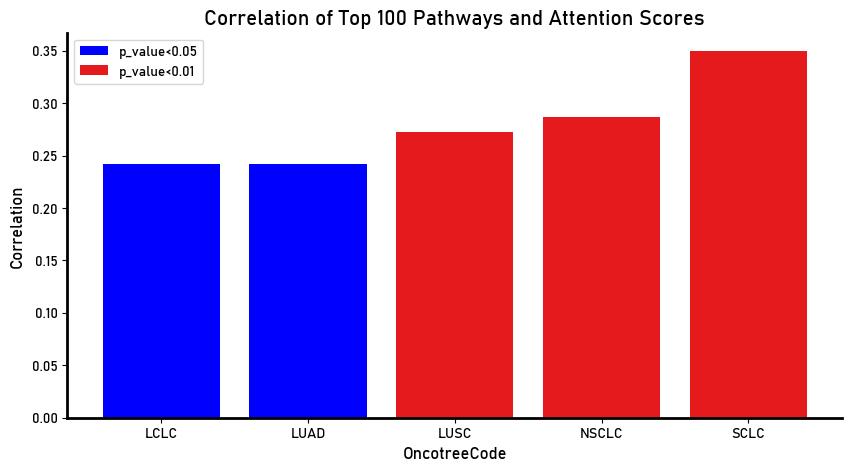

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 筛选出p_value<0.05和p_value<0.01的数据
df_corr_p_value_005 = df_corr_p_value[df_corr_p_value['p_value'] < 0.05]
df_corr_p_value_001 = df_corr_p_value[df_corr_p_value['p_value'] < 0.01]

plt.figure(figsize=(10, 5))

# 为每个部分创建一个条形图
plt.bar(df_corr_p_value_005['OncotreeCode'], df_corr_p_value_005['corr'], color='blue', label='p_value<0.05')
plt.bar(df_corr_p_value_001['OncotreeCode'], df_corr_p_value_001['corr'], color='#E41A1C', label='p_value<0.01')

plt.legend()
plt.title('Correlation of Top 100 Pathways and Attention Scores', fontsize=15)
plt.xlabel('OncotreeCode', fontsize=12)
plt.ylabel('Correlation', fontsize=12)
# Get the current axes, creating one if necessary.
ax = plt.gca()
# Set the spines (the box) visibility
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['bottom'].set_linewidth(2)  # X轴线宽
ax.spines['left'].set_linewidth(2)  # Y轴线宽
ax.spines['bottom'].set_linewidth(2)
plt.savefig('Correlation of Top 100 Pathways and Attention Scores.png', dpi=300, bbox_inches='tight')
plt.show()

Text(0, 0.5, 'Correlation')

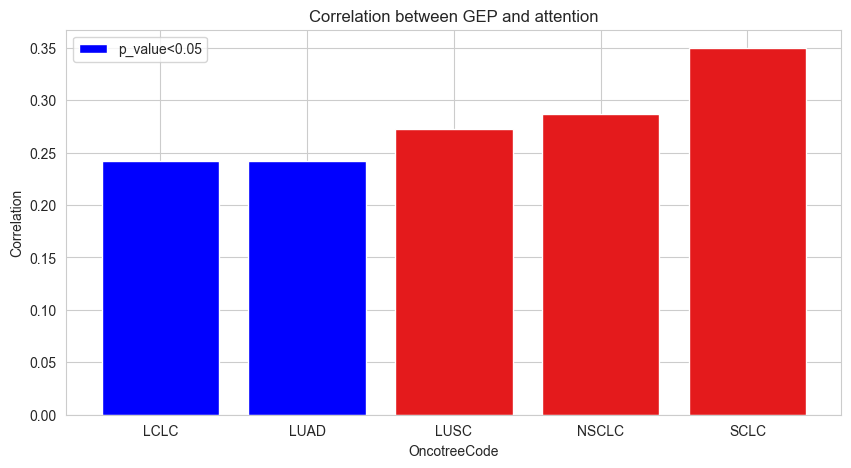

In [36]:
# 画图展示df_corr_p_value的相关性，根据color列进行着色
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(df_corr_p_value['OncotreeCode'], df_corr_p_value['corr'], color=df_corr_p_value['color'])
#根据不同color设置label
plt.legend(labels=['p_value<0.05','p_value<0.01'])
plt.title('Correlation between GEP and attention')
plt.xlabel('OncotreeCode')
plt.ylabel('Correlation')


In [15]:
# 将df_gep_pathways_att进行转置
df_gep_pathways_att = df_gep_pathways_att.T
df_gep_pathways_att.head()

OncotreeCode,LCLC,LUAD,LUSC,NSCLC,SCLC
KEGG_MEDICUS_ENV_FACTOR_ARSENIC_TO_ELECTRON_TRANSFER_IN_COMPLEX_IV,0.001383,0.001385,0.001382,0.001380,0.001378
KEGG_MEDICUS_ENV_FACTOR_BENZO_A_PYRENRE_TO_CYP_MEDIATED_METABOLISM,0.001571,0.001589,0.001595,0.001582,0.001559
KEGG_MEDICUS_ENV_FACTOR_BPA_TO_RAS_ERK_SIGNALING_PATHWAY,0.001526,0.001527,0.001525,0.001525,0.001521
KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,0.001572,0.001659,0.001429,0.001509,0.001546
KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATED_ESTROGEN_SIGNALING_PATHWAY,0.001651,0.001655,0.001651,0.001650,0.001644


In [16]:
# 统计出每列OncotreeCode对应的值前100的值，只统计数值，不统计索引
df_gep_pathways_att_top100 = pd.DataFrame()
for i in df_gep_pathways_att.columns:
    df_gep_pathways_att_top100[i] = df_gep_pathways_att[i].sort_values(ascending=False).head(100).values
df_gep_pathways_att_top100.head(100)

,LCLC,LUAD,LUSC,NSCLC,SCLC
0,0.002647,0.002642,0.002641,0.002630,0.002613
1,0.002628,0.002627,0.002627,0.002613,0.002594
2,0.002624,0.002620,0.002619,0.002611,0.002591
3,0.002623,0.002620,0.002619,0.002608,0.002587
4,0.002616,0.002619,0.002616,0.002603,0.002584
...,...,...,...,...,...
95,0.001665,0.001671,0.001672,0.001703,0.001786
96,0.001658,0.001662,0.001670,0.001692,0.001780
97,0.001653,0.001659,0.001667,0.001692,0.001777
98,0.001651,0.001655,0.001660,0.001682,0.001743


In [103]:
# 统计出每列OncotreeCode对应的值前100的OncoTreeCode
df_gep_pathways_att_top100 = pd.DataFrame()
for i in df_gep_pathways_att.columns:
    df_gep_pathways_att_top100[i] = df_gep_pathways_att[i].sort_values(ascending=False).head(100).index
df_gep_pathways_att_top100.head(100)

,LCLC,LUAD,LUSC,NSCLC,SCLC
0,KEGG_MEDICUS_REFERENCE_IGG_FCGR_RAC_SIGNALING_...,KEGG_MEDICUS_REFERENCE_IGG_FCGR_RAC_SIGNALING_...,KEGG_MEDICUS_REFERENCE_IGG_FCGR_RAC_SIGNALING_...,KEGG_MEDICUS_REFERENCE_IGG_FCGR_RAC_SIGNALING_...,KEGG_MEDICUS_REFERENCE_IGG_FCGR_RAC_SIGNALING_...
1,KEGG_MEDICUS_VARIANT_MUTATION_CAUSED_ABERRANT_...,KEGG_MEDICUS_VARIANT_MUTATION_CAUSED_ABERRANT_...,KEGG_MEDICUS_VARIANT_MUTATION_CAUSED_ABERRANT_...,KEGG_MEDICUS_VARIANT_MUTATION_CAUSED_ABERRANT_...,KEGG_MEDICUS_VARIANT_MUTATION_CAUSED_ABERRANT_...
2,KEGG_MEDICUS_REFERENCE_BMP_HAMP_SIGNALING_PATH...,KEGG_MEDICUS_VARIANT_MLL_ENL_FUSION_TO_TRANSCR...,KEGG_MEDICUS_REFERENCE_BMP_HAMP_SIGNALING_PATH...,KEGG_MEDICUS_REFERENCE_BMP_HAMP_SIGNALING_PATH...,KEGG_MEDICUS_REFERENCE_BMP_HAMP_SIGNALING_PATH...
3,KEGG_MEDICUS_REFERENCE_NRG_ERBB4_PI3K_SIGNALIN...,KEGG_MEDICUS_REFERENCE_BMP_HAMP_SIGNALING_PATH...,KEGG_MEDICUS_REFERENCE_NRG_ERBB4_PI3K_SIGNALIN...,KEGG_MEDICUS_VARIANT_MLL_ENL_FUSION_TO_TRANSCR...,KEGG_MEDICUS_REFERENCE_NRG_ERBB4_PI3K_SIGNALIN...
4,KEGG_MEDICUS_PATHOGEN_HCMV_US28_TO_GNAI_AC_PKA...,KEGG_MEDICUS_REFERENCE_NRG_ERBB4_PI3K_SIGNALIN...,KEGG_MEDICUS_VARIANT_MLL_ENL_FUSION_TO_TRANSCR...,KEGG_MEDICUS_PATHOGEN_HCMV_US28_TO_GNAI_AC_PKA...,KEGG_MEDICUS_VARIANT_MLL_ENL_FUSION_TO_TRANSCR...
...,...,...,...,...,...
95,KEGG_MEDICUS_REFERENCE_ACTIVIN_SIGNALING_PATHWAY,KEGG_MEDICUS_REFERENCE_FGF_FGFR_RAS_ERK_SIGNAL...,KEGG_MEDICUS_REFERENCE_FGF_FGFR_RAS_ERK_SIGNAL...,KEGG_MEDICUS_PATHOGEN_HTLV_1_P12_TO_ANTIGEN_PR...,KEGG_MEDICUS_PATHOGEN_HPV_E5_TO_ANTIGEN_PROCES...
96,KEGG_MEDICUS_REFERENCE_IFN_RIPK1_3_SIGNALING_P...,KEGG_MEDICUS_REFERENCE_ACTIVIN_SIGNALING_PATHWAY,KEGG_MEDICUS_VARIANT_MUTATION_INACTIVATED_PRKA...,KEGG_MEDICUS_REFERENCE_REGULATION_OF_FIBRINOLY...,KEGG_MEDICUS_REFERENCE_EGF_EGFR_PI3K_NFKB_SIGN...
97,KEGG_MEDICUS_REFERENCE_HEPARAN_SULFATE_BIOSYNT...,KEGG_MEDICUS_ENV_FACTOR_DCE_TO_DNA_ADDUCTS,KEGG_MEDICUS_REFERENCE_KINETOCHORE_MICROTUBULE...,KEGG_MEDICUS_REFERENCE_BMP9_10_SIGNALING_PATHWAY,KEGG_MEDICUS_REFERENCE_IL6_FAMILY_TO_JAK_STAT_...
98,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATE...,KEGG_MEDICUS_ENV_FACTOR_E2_TO_NUCLEAR_INITIATE...,KEGG_MEDICUS_REFERENCE_ACTIVIN_SIGNALING_PATHWAY,KEGG_MEDICUS_REFERENCE_FGF_FGFR_RAS_ERK_SIGNAL...,KEGG_MEDICUS_PATHOGEN_EBV_EBNA2_TO_RBP_JK_MEDI...


In [104]:

LCLC_GEP_pathways_att = df_gep_pathways_att_top100['LCLC']
LUAD_GEP_pathways_att = df_gep_pathways_att_top100['LUAD']
LUSC_GEP_pathways_att = df_gep_pathways_att_top100['LUSC']
NSCLC_GEP_pathways_att = df_gep_pathways_att_top100['NSCLC']
SCLC_GEP_pathways_att = df_gep_pathways_att_top100['SCLC']
# 取五个肺癌亚型的交集
LCLC_LUAD_LUSC_NSCLC_SCLC_GEP_pathways_att = list(set(LCLC_GEP_pathways_att).intersection(set(LUAD_GEP_pathways_att)).intersection(set(LUSC_GEP_pathways_att)).intersection(set(NSCLC_GEP_pathways_att)).intersection(set(SCLC_GEP_pathways_att)))
print('五种肺癌亚型基因表达差异值前100通路attention交集:',len(LCLC_LUAD_LUSC_NSCLC_SCLC_GEP_pathways_att))

五种肺癌亚型基因表达差异值前100通路attention交集 85


In [106]:
#药物分析：
# C1CCC(C(C1)[NH-])[NH-].C(=O)(C(=O)O)O.[Pt+2] Oxaliplatin
# CN(C)CCC(CSC1=CC=CC=C1)NC2=C(C=C(C=C2)S(=O)(=O)NC(=O)C3=CC=C(C=C3)N4CCN(CC4)CC5=CC=CC=C5C6=CC=C(C=C6)Cl)[N+](=O)[O-] 	ABT737
# CNC(=O)C1=CC=CC=C1SC2=CC3=C(C=C2)C(=NN3)C=CC4=CC=CC=N4 	Axitinib


